# Gold vs Bitcoin: Returns and Volatility Analysis


In [4]:
## 1. Imports and Setup

%pip install seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
sns.set_style('darkgrid')
sns.set_context('talk')


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 2. Data Download and Preparation

# Download Gold futures and Bitcoin
raw = yf.download(["GC=F", "BTC-USD"], start="2015-01-01")
data = raw['Close'][["GC=F", "BTC-USD"]]

# Rename columns for clarity
data = data.rename(columns={"GC=F": "Gold", "BTC-USD": "Bitcoin"})

# Check first rows and missing values
print(data.head())
print("\nMissing values:\n", data.isnull().sum())

/var/folders/zp/vjfzyzqd2pggcq5nckdbb_6c0000gn/T/ipykernel_11187/1502574794.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(["GC=F", "BTC-USD"], start="2015-01-01")
[*********************100%***********************]  2 of 2 completed

Ticker             Gold     Bitcoin
Date                               
2015-01-01          NaN  314.248993
2015-01-02  1186.000000  315.032013
2015-01-03          NaN  281.082001
2015-01-04          NaN  264.195007
2015-01-05  1203.900024  274.473999

Missing values:
 Ticker
Gold       1220
Bitcoin       0
dtype: int64


Interpretation

- Gold (GC=F) has 1220 missing values, while Bitcoin (BTC-USD) has none.
- Missing values in Gold are likely due to non-trading days (weekends, holidays, or periods before the futures contract existed).
- This is common when using futures data; daily historical data often only exists for trading days.

In [6]:
# 3. Return Calculations

# Daily log returns
daily_returns = np.log(data / data.shift(1)).dropna()

# Weekly log returns (last price of each week)
weekly = data.resample("W").last()
weekly_returns = np.log(weekly / weekly.shift(1)).dropna()

print("\nFirst daily returns:\n", daily_returns.head())
print("\nFirst weekly returns:\n", weekly_returns.head())


First daily returns:
 Ticker          Gold   Bitcoin
Date                          
2015-01-06  0.012711  0.041796
2015-01-07 -0.007161  0.028073
2015-01-08 -0.001819 -0.038046
2015-01-09  0.006270  0.024607
2015-01-13  0.001297 -0.170306

First weekly returns:
 Ticker          Gold   Bitcoin
Date                          
2015-01-11  0.024980  0.005530
2015-01-18  0.048869 -0.233497
2015-01-25  0.012220  0.187503
2015-02-01 -0.010968 -0.111397
2015-02-08 -0.035508 -0.015809


Insights:

1. Daily Returns:
    - Represent the percentage change from one trading day to the next using log returns, which are standard for financial analysis because they are additive over time.

2. Weekly Returns:
    - Using weekly data helps smooth out daily volatility and handle missing values in Gold due to non-trading days.
    - The weekly log returns are calculated from the last available price of each week.

3. Practical Note:
    - Daily returns can be noisy, especially for highly volatile assets like Bitcoin. Weekly returns give a clearer picture of medium-term trends and relative risk.

In [7]:
# 4. Volatility and Risk Analysis

# Daily volatility
daily_vol = daily_returns.std()
annual_daily_vol = daily_vol * np.sqrt(252)  # 252 trading days

# Weekly volatility
weekly_vol = weekly_returns.std()
annual_weekly_vol = weekly_vol * np.sqrt(52)  # 52 weeks per year

print("\nDaily volatility:\n", daily_vol)
print("\nAnnualized daily volatility:\n", annual_daily_vol)
print("\nWeekly volatility:\n", weekly_vol)
print("\nAnnualized weekly volatility:\n", annual_weekly_vol)



Daily volatility:
 Ticker
Gold       0.009335
Bitcoin    0.038600
dtype: float64

Annualized daily volatility:
 Ticker
Gold       0.148183
Bitcoin    0.612763
dtype: float64

Weekly volatility:
 Ticker
Gold       0.020433
Bitcoin    0.094599
dtype: float64

Annualized weekly volatility:
 Ticker
Gold       0.147345
Bitcoin    0.682163
dtype: float64


Volatility Analysis Insights:

1. Daily Volatility:
    - Gold: 0.93% per day
    - Bitcoin: 3.86% per day
            Interpretation:  Bitcoin is roughly 4 times more volatile than Gold on a daily basis, reflecting its higher short-term risk

2. Annualized Daily Volatility
    - Gold: 14.8% per year
    - Bitcoin: 61.3% per year
            Interpretation: When scaled to yearly risk, Bitcoin's volatility is substantially hight, emphasizing its speculative nature compared to Gold

3. Weekly Volatility:
    - Gold: 2.04% per week
    - Bitcoing: 9.45% per week
            Interpretation: Weekly returns smooth out some of the daily noise, but Bitcoin remains far more volatile than Gold.

4. Annualized Weekly Volatility:
    - Gold: 14.7% per year
    - Bitcoin: 68.2% per year
            Interpretation: Weekly and daily annualized volatilites for Gold are similiar, showing Gold's stable behavior. For Bitcoin, annualized volatility slightly increase when using weekly data, reflecting the impact of larger weekly swings.

In [8]:
# 5. Summary Statistics

# Descriptive statistics for prices
print("\nPrice statistics:\n", data.describe())

# Descriptive statistics for daily returns
print("\nDaily returns statistics:\n", daily_returns.describe())


Price statistics:
 Ticker         Gold        Bitcoin
count   2689.000000    3909.000000
mean    1706.184231   25471.318985
std      547.200237   29569.225093
min     1050.800049     178.102997
25%     1269.900024    3576.032471
50%     1667.300049   10760.066406
75%     1921.099976   40077.074219
max     3649.399902  123344.062500

Daily returns statistics:
 Ticker         Gold      Bitcoin
count   2106.000000  2106.000000
mean       0.000474     0.001233
std        0.009335     0.038600
min       -0.047416    -0.464730
25%       -0.004338    -0.013868
50%        0.000450     0.001393
75%        0.005719     0.018389
max        0.057775     0.225119


Summary Statistics Insights

1. Price Statitics

    - Gold:
        Average price = ~$1,706.18, with standard deviation of $547.20
        Price ranged from $1,050.80 to $3,649.39

    - Bitcoin:
        Average price = ~$25,471.31 with standard deviation of $29,569.22
        Price ranged from $178.10 to $123,344.06

                Insights: Bitcoin shows extreme price variability compared to Gold, reflecting its high growth potential and speculative nature. Gold's price is much more stable, confirming its role as a safe-heaven asset.


2. Daily Returns Statistics

    - Gold: 
        Mean daily return = ~ 0.047%, median = ~0.045%
        Daily returns mostly fluctuate between -4.74% and +5.77%

                Insights: - Bitcoin daily returns are highly dispersed, showing occasional large gains or losses.
                          - Gold daily returns are small and consistent, reinforcing its low-risk profile.
                          - This confirms the volatility analysis: Bitcoin carries higher short-terms risk, while Gold is much steadier.


Key Takeaways
- Risk vs. Reward: Bitcoin offers higher potential returns but comes with extreme variability. Gold offers stability with modest returns.
- Outliers: Bitcoin has very large daily swings, which can heavily influence statistics like mean and standard deviation.
- Portfolio Implications: Gold could serve as a stabilizer in a mixed portfolio with Bitcoin, balancing high risk with low-risk assets.


Daily correlation:
 Ticker       Gold   Bitcoin
Ticker                     
Gold     1.000000  0.081248
Bitcoin  0.081248  1.000000

Weekly correlation:
 Ticker       Gold   Bitcoin
Ticker                     
Gold     1.000000  0.059952
Bitcoin  0.059952  1.000000


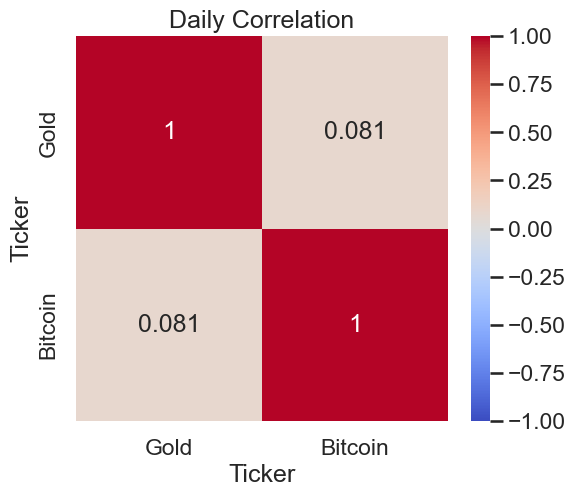

In [9]:
# 6. Correlation Analysis

# Daily correlation
daily_corr = daily_returns.corr()
# Weekly correlation
weekly_corr = weekly_returns.corr()

print("\nDaily correlation:\n", daily_corr)
print("\nWeekly correlation:\n", weekly_corr)

# Visualize daily correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(daily_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Daily Correlation')
plt.show()

Correlation Analysis Insights

    1. Daily Correlation
        - Correlation between Gold and Bitcoin: 0.081
            Interpretation:
                - Daily returns of Gold and Bitcoin are almost uncorrelated.
                - A correlation near zero suggests that price movements of one asset do not predict movements of the other on a day-to-day basis.

    2. Weekly Correlation
        - Correlation between Gold and Bitcoin: 0.060
            Interpretation:
                - Even when considering weekly returns, the correlation remains very low.
                - This reinforces the idea that Gold can serve as a diversification tool alongside Bitcoin in a portfolio.

Key Takeaways

        - Low Correlation: Gold and Bitcoin show very low correlation at both daily and weekly levels.
        - Portfolio Diversification: Adding Gold to a Bitcoin portfolio could help reduce overall portfolio volatility because their returns do not move in sync.
        - Frequency Consideration: Correlations are similar across daily and weekly frequencies, indicating that their independence is consistent over short- and medium-term periods.

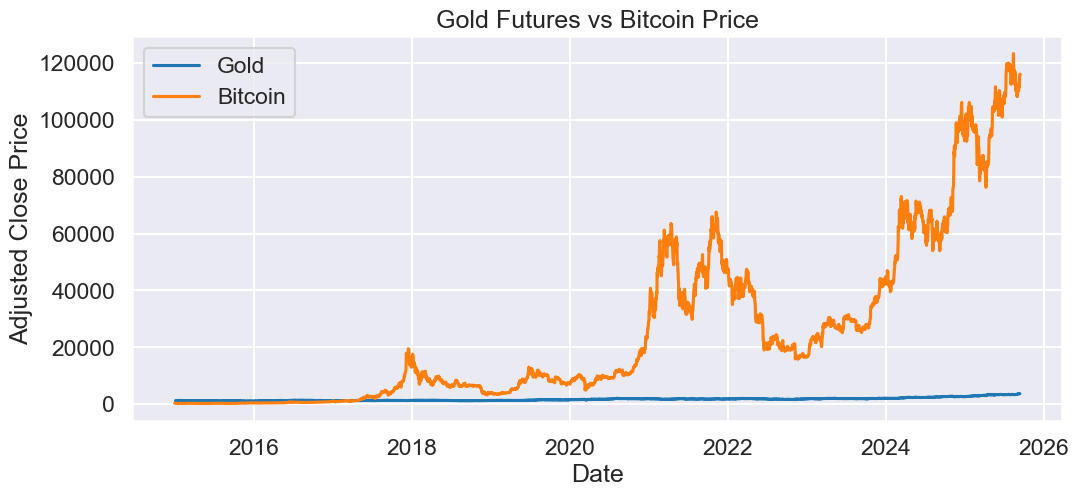

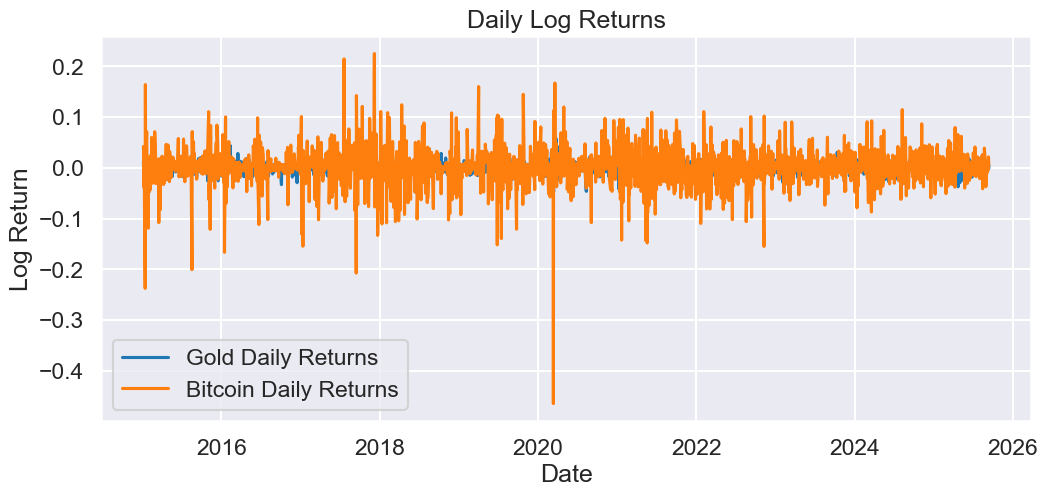

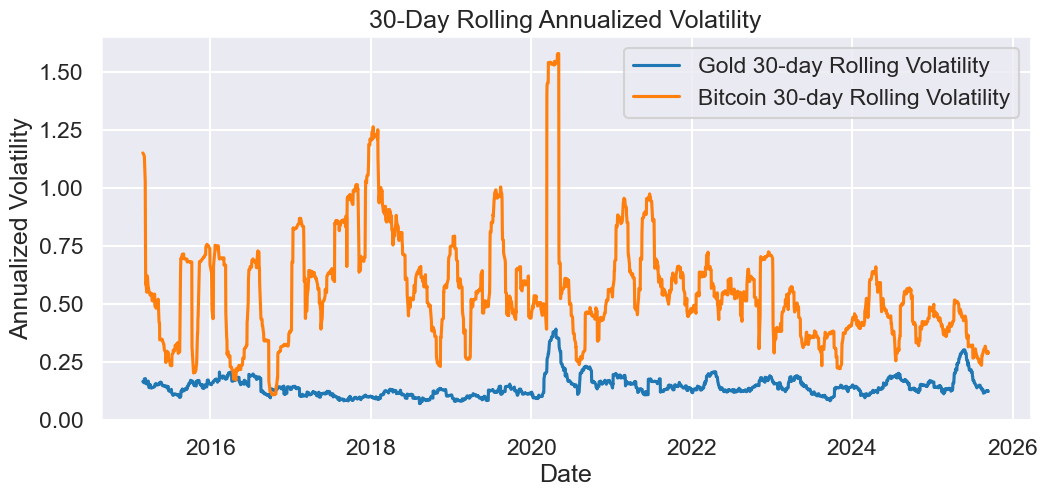

In [ ]:
# 7. Visualization

# Historical prices
plt.figure(figsize=(12,5))
plt.plot(data['Gold'], label='Gold')
plt.plot(data['Bitcoin'], label='Bitcoin')
plt.title('Gold Futures vs Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Daily returns
plt.figure(figsize=(12,5))
plt.plot(daily_returns['Gold'], label='Gold Daily Returns')
plt.plot(daily_returns['Bitcoin'], label='Bitcoin Daily Returns')
plt.title('Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

# 30-day rolling volatility
rolling_vol = daily_returns.rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(12,5))
plt.plot(rolling_vol['Gold'], label='Gold 30-day Rolling Volatility')
plt.plot(rolling_vol['Bitcoin'], label='Bitcoin 30-day Rolling Volatility')
plt.title('30-Day Rolling Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()


Interpretation of Each Plot

1. Historical Prices:
    - Gold shows a relatively smooth upward trend with moderate fluctuations.
    - Bitcoin exhibits explosive growth, large cycles, and sharp crashes, confirming its speculative and high-volatilyty profile.

2. Daily returns:
    - Gold returns are small and clustered around zeros.
    - Bitcoin returns are much more dispersed, with large spikes (both positives and negatives), highlighting higher short-term risk and opportunity

3. 30-Day Rolling Volatility 
    - Gold’s volatility remains relatively low and stable over time.
    - Bitcoin’s volatility fluctuates dramatically, often spiking during market stress or speculative booms.
    - This shows why Bitcoin is riskier but potentially more rewarding, while Gold serves as a stable asset or hedge.

In [ ]:
# 8. Interpretation and Conclusions
print("""
Conclusions:

1. Bitcoin shows significantly higher volatility than Gold across all frequencies.
2. Correlations are low, suggesting Gold can serve as a diversifier relative to Bitcoin.
3. Exploring and validating the data before drawing conclusions is crucial to avoid misinterpretation.
4. Rolling volatility illustrates how the risk of each asset changes over time.
""")


Conclusions:

1. Bitcoin shows significantly higher volatility than Gold across all frequencies.
2. Correlations are low, suggesting Gold can serve as a diversifier relative to Bitcoin.
3. Exploring and validating the data before drawing conclusions is crucial to avoid misinterpretation.
4. Rolling volatility illustrates how the risk of each asset changes over time.

